### We have a data of patients in which the 'Goal field refers to the presence of heart disease.
### We need to find if there are any trends to figure out ny heart data to predict certain cardiovascular events or find any clear indications of heart health.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('heart.csv')

In [3]:
data.shape

(303, 14)

In [32]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [33]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [35]:
data.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [43]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

## Data Analyzing

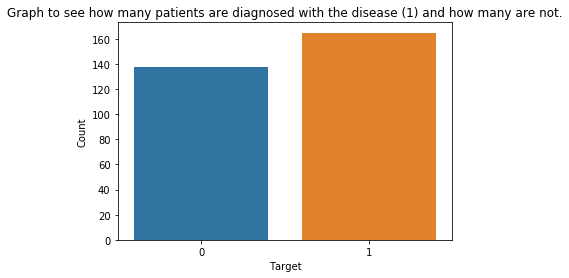

In [104]:
sns.countplot(x='target',data=data)
plt.title("Graph to see how many patients are diagnosed with the disease (1) and how many are not.")
plt.xlabel("Target")
plt.ylabel('Count')
plt.show()

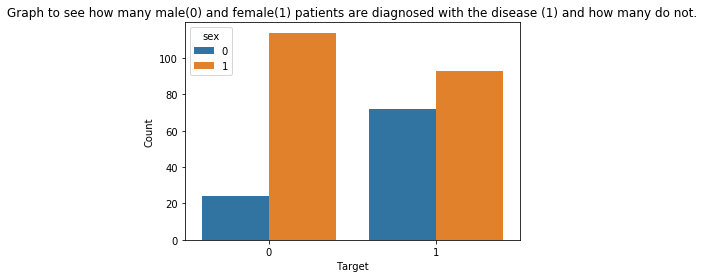

In [68]:
sns.countplot(x='target',hue='sex',data=data)
plt.title("Graph to see how many male(0) and female(1) patients are diagnosed with the disease (1) and how many do not.")
plt.xlabel("Target")
plt.ylabel('Count')
plt.show()

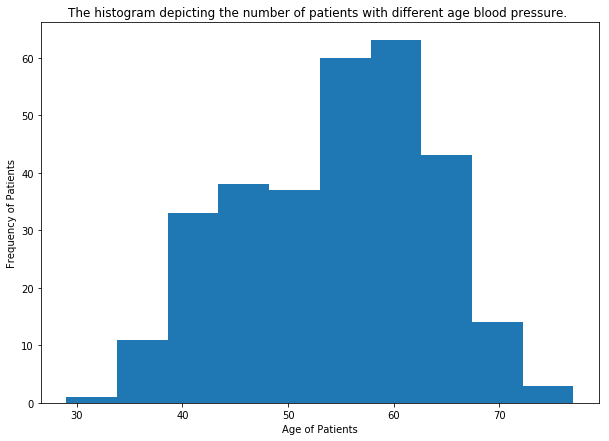

In [101]:
data['age'].plot.hist(figsize=(10,7))
plt.xlabel("Age of Patients")
plt.ylabel("Frequency of Patients")
plt.title("The histogram depicting the number of patients with different age blood pressure. ")
plt.show()


Text(0, 0.5, 'Count')

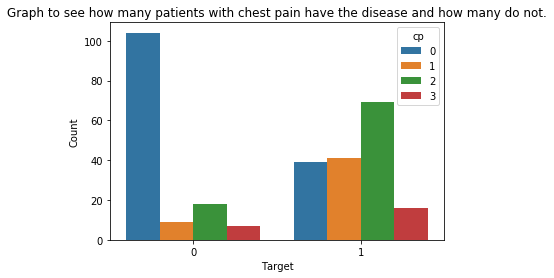

In [81]:
sns.countplot(x='target',hue='cp',data=data)
plt.title("Graph to see how many patients with chest pain have the disease and how many do not.")
plt.xlabel("Target")
plt.ylabel('Count')

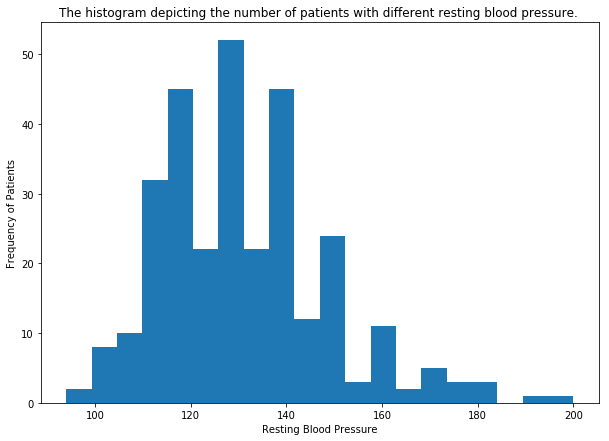

In [103]:
data['trestbps'].plot.hist(bins = 20, figsize=(10,7))
plt.xlabel("Resting Blood Pressure")
plt.ylabel("Frequency of Patients")
plt.title("The histogram depicting the number of patients with different resting blood pressure. ")
plt.show()

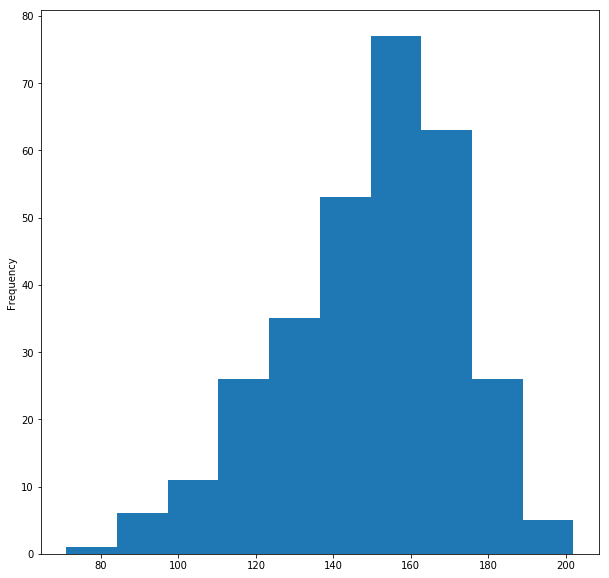

In [112]:
data['thalach'].plot.hist(figsize=(10,10))

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


### Train Data

In [134]:
X=data.drop('target',axis=1)
y=data['target']

In [135]:
from sklearn.model_selection import train_test_split

In [136]:
X_train,x_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2,random_state=1)

In [137]:
from sklearn.linear_model import LogisticRegression

In [138]:
logmodel=LogisticRegression()

In [139]:
logmodel.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [141]:
predictions=logmodel.predict(x_test)

In [144]:
from sklearn.metrics import classification_report

In [145]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.80      0.67      0.73        30\n           1       0.72      0.84      0.78        31\n\n   micro avg       0.75      0.75      0.75        61\n   macro avg       0.76      0.75      0.75        61\nweighted avg       0.76      0.75      0.75        61\n'

In [148]:
from sklearn.metrics import confusion_matrix

In [150]:
confusion_matrix(y_test,predictions)

array([[20, 10],
       [ 5, 26]], dtype=int64)

In [152]:
from sklearn.metrics import accuracy_score

In [153]:
accuracy_score(y_test,predictions)

0.7540983606557377